**Import Required Library**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset of Covid_19**

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

**EDA Part (Exporatory Data Analysis)**

In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum().sum()

np.int64(34404)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.head(5)

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0              0    Afghanistan  33.93911  67.709953  2020-01-22          0   
1              0        Albania  41.15330  20.168300  2020-01-22          0   
2              0        Algeria  28.03390   1.659600  2020-01-22          0   
3              0        Andorra  42.50630   1.521800  2020-01-22          0   
4              0         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [ ]:
df.tail()

Province/State         Country/Region        Lat       Long        Date  \
49063              0  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064              0                  Yemen  15.552727  48.516388  2020-07-27   
49065              0                Comoros -11.645500  43.333300  2020-07-27   
49066              0             Tajikistan  38.861000  71.276100  2020-07-27   
49067              0                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa

In [ ]:
df.drop(columns=['Province/State'], inplace=True)

In [ ]:
df

Country/Region        Lat       Long        Date  Confirmed  \
0                Afghanistan  33.939110  67.709953  2020-01-22          0   
1                    Albania  41.153300  20.168300  2020-01-22          0   
2                    Algeria  28.033900   1.659600  2020-01-22          0   
3                    Andorra  42.506300   1.521800  2020-01-22          0   
4                     Angola -11.202700  17.873900  2020-01-22          0   
...                      ...        ...        ...         ...        ...   
49063  Sao Tome and Principe   0.186400   6.613100  2020-07-27        865   
49064                  Yemen  15.552727  48.516388  2020-07-27       1691   
49065                Comoros -11.645500  43.333300  2020-07-27        354   
49066             Tajikistan  38.861000  71.276100  2020-07-27       7235   
49067                Lesotho -29.610000  28.233600  2020-07-27        505   

       Deaths  Recovered  Active             WHO Region  
0           0          0       0  Eastern Mediterranean  
1           0          0       0                 Europe  
2           0          0       0                 Africa  
3           0          0       0                 Europe  
4           0          0       0                 Africa  
...       ...        ...     ...                    ...  
49063      14        734     117                 Africa  
49064     483        833     375  Eastern Mediterranean  
49065       7        328      19                 Africa  
49066      60       6028    1147                 Europe  
49067      12        128     365                 Africa  

[49068 rows x 9 columns]

In [ ]:
df = df.rename(columns={'Country/Region': 'Country'})

In [ ]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'WHO Region'],
      dtype='object')

**Using the Aggregation Method**

In [ ]:
df.groupby('Country')['WHO Region'].value_counts()

Country             WHO Region           
Afghanistan         Eastern Mediterranean    188
Albania             Europe                   188
Algeria             Africa                   188
Andorra             Europe                   188
Angola              Africa                   188
                                            ... 
West Bank and Gaza  Eastern Mediterranean    188
Western Sahara      Africa                   188
Yemen               Eastern Mediterranean    188
Zambia              Africa                   188
Zimbabwe            Africa                   188
Name: count, Length: 187, dtype: int64

**Top10 Countries Cases: Confirmed, Deaths, Recovered, Active**

In [ ]:
top10 = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(by='Confirmed', ascending=False).head(10)
top10

Confirmed    Deaths  Recovered     Active
Country                                                  
US              224345948  11011411   56353416  156981121
Brazil           89524967   3938034   54492873   31094060
Russia           45408411    619385   25120448   19668578
India            40883464   1111831   23783720   15987913
Spain            27404045   3033030   15093583    9277432
United Kingdom   26748587   3997775     126217   22624595
Italy            26745145   3707717   15673910    7363518
France           21210926   3048524    7182115   10980287
Germany          21059152    871322   17107839    3079991
Iran             19339267   1024136   15200895    3114236

**top_last10 Countries Cases: Confirmed, Deaths, Recovered, Active**

In [ ]:
top_last10 = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(by='Confirmed', ascending=False).tail(10)
top_last10

Confirmed  Deaths  Recovered  Active
Country                                                    
Grenada                     2466       0       1848     618
Fiji                        2266       0       1568     698
Saint Lucia                 2236       0       1860     376
Laos                        2229       0       1540     689
Dominica                    2059       0       1659     400
Saint Kitts and Nevis       1772       0       1295     477
Greenland                   1507       0       1372     135
Holy See                    1356       0        742     614
Papua New Guinea            1185       2        695     488
Western Sahara               901      63        648     190

**Using Seaborn done the Visualization Analysis**

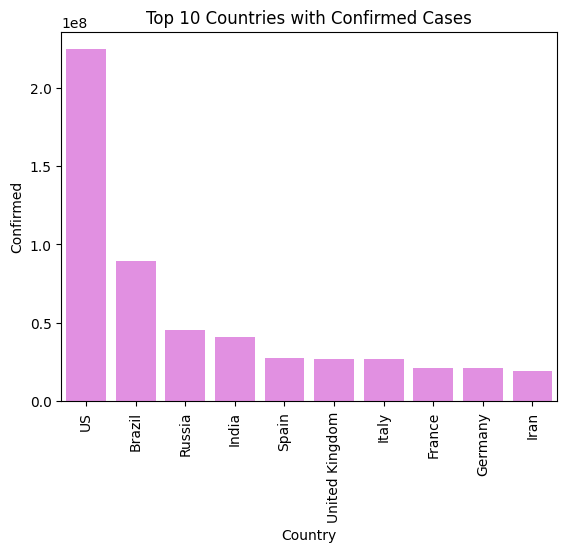

In [ ]:
sns.barplot(x=top10.index, y=top10['Confirmed'],color= 'violet')
plt.title('Top 10 Countries with Confirmed Cases')
plt.xticks(rotation=90)

plt.savefig('top10_confirmed_cases', dpi=300, bbox_inches='tight')
plt.show()

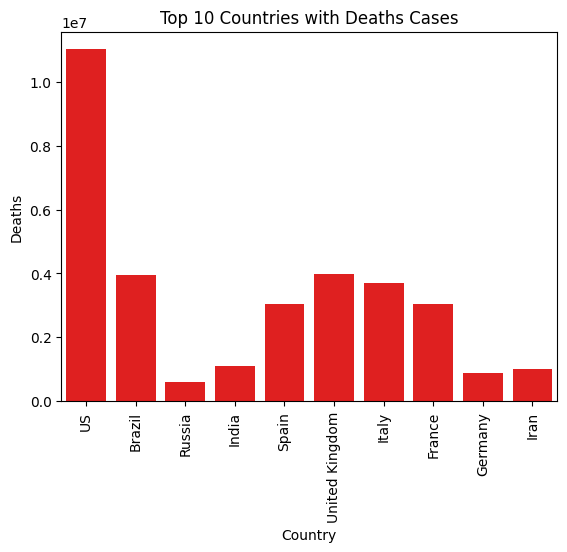

In [ ]:
sns.barplot(x=top10.index, y=top10['Deaths'],color='red')
plt.title('Top 10 Countries with Deaths Cases')
plt.xticks(rotation=90)

plt.savefig('top10_death_cases.png', dpi=300, bbox_inches='tight')
plt.show()

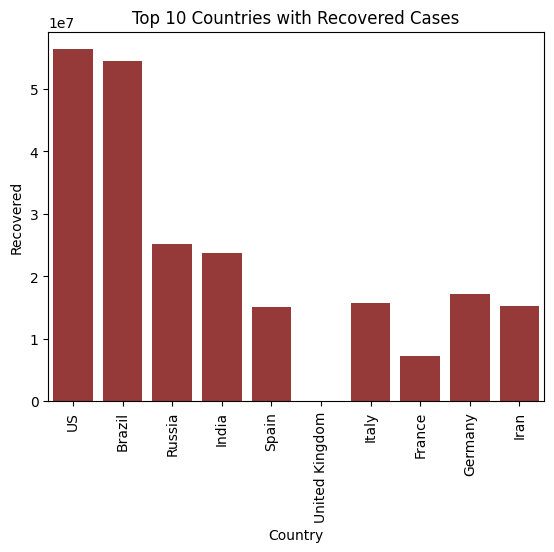

In [ ]:
sns.barplot(x=top10.index, y=top10['Recovered'],color='Brown')
plt.title('Top 10 Countries with Recovered Cases')
plt.xticks(rotation=90)

plt.savefig('top10_recovered_cases.png', dpi=300, bbox_inches='tight')
plt.show()

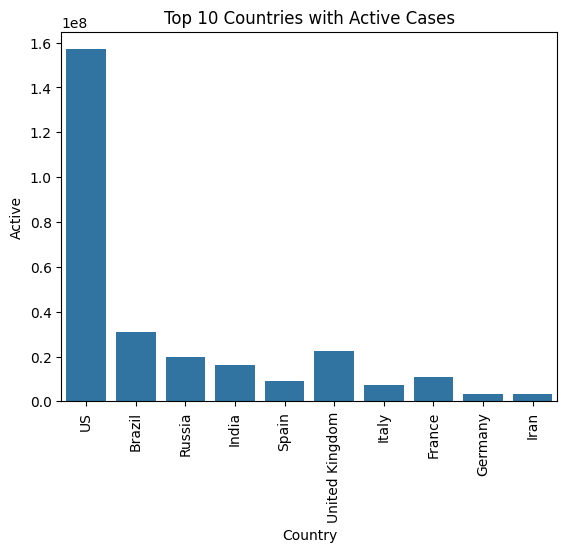

In [ ]:
sns.barplot(x=top10.index, y=top10['Active'])
plt.title('Top 10 Countries with Active Cases')
plt.xticks(rotation=90)

plt.savefig('Top10_active_cases.png', dpi=300, bbox_inches='tight')
plt.show()

**Region_Data By The WHO**

In [ ]:
region_data = df.groupby('WHO Region')[['Confirmed','Deaths','Recovered','Active']].sum()

region_data


Confirmed    Deaths  Recovered     Active
WHO Region                                                      
Africa                  21791827    439978   11193730   10158119
Americas               402261194  19359292  157069444  225832458
Eastern Mediterranean   74082892   1924029   48050703   24108160
Europe                 248879793  19271040  123202075  106406678
South-East Asia         55118365   1458134   30030327   23629904
Western Pacific         26374411    932430   18861950    6580031

/tmp/ipython-input-3289371091.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




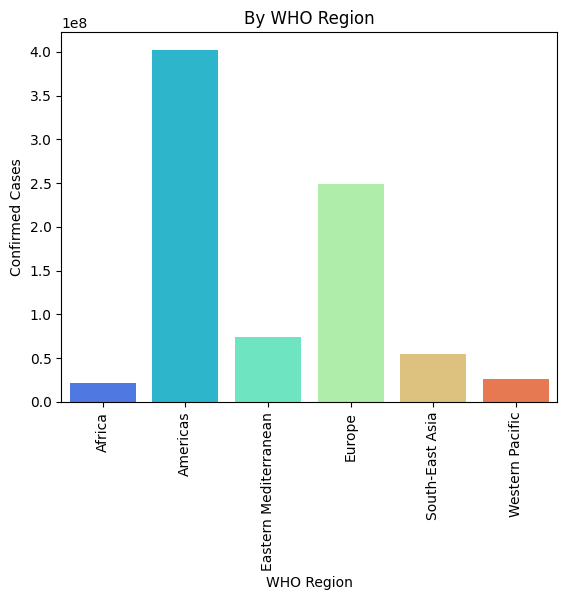

In [ ]:
sns.barplot(x=region_data.index, y=region_data['Confirmed'],palette='rainbow')
plt.xticks(rotation=90)
plt.title('By WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')

plt.savefig('WHO_Region.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'WHO Region'],
      dtype='object')

**I have got the Death_Rate% of Top 10 Countries**

In [ ]:
country_data = df.groupby('Country')[['Confirmed','Deaths']].sum()
country_data['Death_Rate (%)'] = (country_data['Deaths'] / country_data['Confirmed']) * 100
country_data.sort_values(by='Death_Rate (%)', ascending=False).head(10)


Confirmed   Deaths  Death_Rate (%)
Country                                           
Yemen               67180    17707       26.357547
Belgium           6281116   963679       15.342481
United Kingdom   26748587  3997775       14.945743
France           21210926  3048524       14.372423
Italy            26745145  3707717       13.863140
Hungary            396247    51053       12.884135
Netherlands       5167516   622314       12.042807
Mexico           14946202  1728277       11.563319
Spain            27404045  3033030       11.067819
Bahamas             12100     1203        9.942149

**Date-wise Analysis**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
datewise = df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
datewise.head(10)

Confirmed  Deaths  Recovered
Date                                    
2020-01-22        555      17         28
2020-01-23        654      18         30
2020-01-24        941      26         36
2020-01-25       1434      42         39
2020-01-26       2118      56         52
2020-01-27       2927      82         61
2020-01-28       5578     131        107
2020-01-29       6166     133        125
2020-01-30       8234     171        141
2020-01-31       9927     213        219

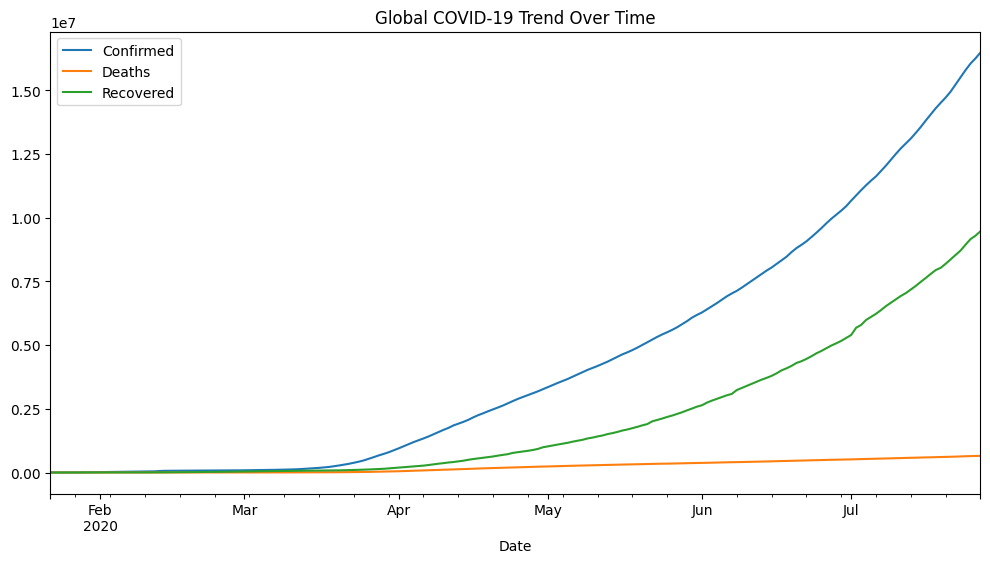

In [ ]:
datewise.plot(figsize=(12,6))
plt.title('Global COVID-19 Trend Over Time')

plt.savefig('Global_Trend_Over_Time.png', dpi=300, bbox_inches='tight')
plt.show()

**I have got the Recovery_Rate% of Top 10 Countries**

In [ ]:
recovery_data = df.groupby('Country')[['Confirmed','Recovered']].sum()
recovery_data['Recovery_Rate (%)'] = (recovery_data['Recovered'] / recovery_data['Confirmed']) * 100
recovery_data.sort_values(by='Recovery_Rate (%)', ascending=False).head(10)

Confirmed  Recovered  Recovery_Rate (%)
Country                                               
Liechtenstein      10351       9477          91.556371
Greenland           1507       1372          91.041805
Iceland           221241     190132          85.938863
Thailand          366527     312360          85.221553
New Zealand       175979     149560          84.987413
Brunei             18168      15262          84.004844
Saint Lucia         2236       1860          83.184258
Mauritius          39448      32602          82.645508
Cambodia           17079      13917          81.486035
Germany         21059152   17107839          81.237075

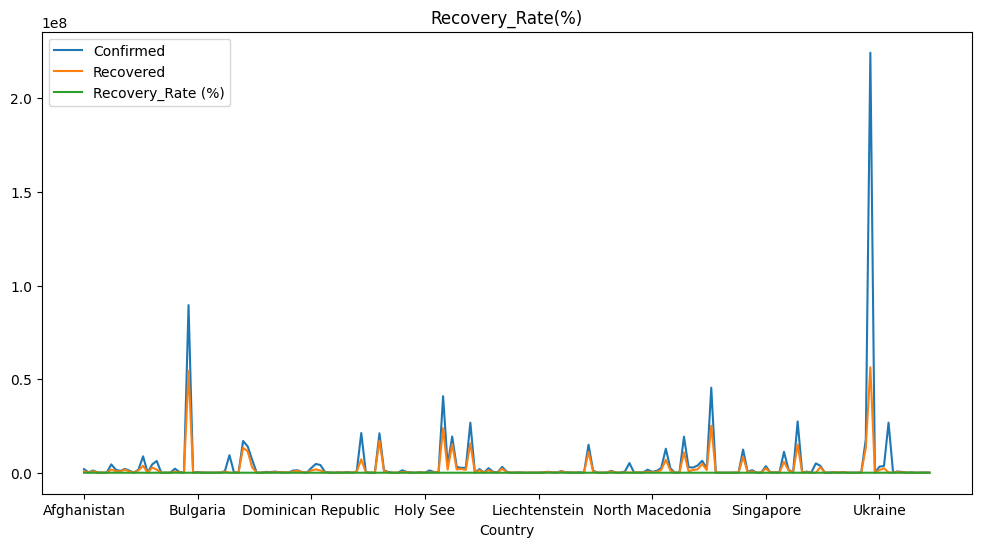

In [ ]:
recovery_data.plot(figsize=(12,6))
plt.title('Recovery_Rate(%)')

plt.savefig('Recovery_Rate%.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'WHO Region'],
      dtype='object')

**Correlaion Data**

In [ ]:
corr_data = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]
corr_matrix = corr_data.corr()
corr_matrix

Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.912361   0.895506  0.950255
Deaths      0.912361  1.000000   0.763090  0.891858
Recovered   0.895506  0.763090   1.000000  0.713088
Active      0.950255  0.891858   0.713088  1.000000

**Heatmap of Correlation**

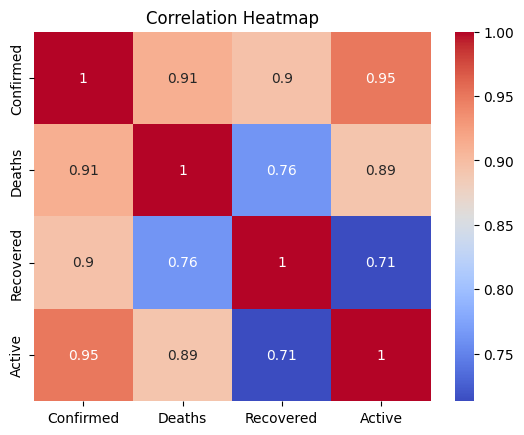

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**Visualization in World_map**

In [ ]:
country_cases = df.groupby('Country')[['Confirmed']].sum().reset_index()
# Mark affected countries
country_cases['Affected'] = country_cases['Confirmed'] > 0

import plotly.express as px

fig = px.choropleth(
    country_cases,
    locations='Country',
    locationmode='country names',
    color='Confirmed',
    hover_name='Country',
    color_continuous_scale='Reds',
    title='World Map Showing COVID-19 Affected Countries'
)
fig.show()

